In [1]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.visualization import quantity_support
quantity_support()
u.set_enabled_equivalencies(u.dimensionless_angles())
from tdwg.lib.beams_utils import get_q_parameter
import tdwg.lib.diffraction2 as diff2
%matplotlib inline

In [24]:
# use to set precision:
# the larger the value, the smaller the pixel grid, i.e. a more accurate and slower simulation
# anything larger than 7 will result in sub-wavelength pixels and break the simulation
# anything smaller than 4 will result in numerical artifacts
n = 0 
print(f'{2**n} simulation pixels per DMD pixel')

1 simulation pixels per DMD pixel


### Create grating

In [25]:
DMD_pixel_size = 13.7e-3*u.mm
simulation_pixel_size = DMD_pixel_size/2**n
x_input = np.arange(-2**(n+10), 2**(n+10)) * simulation_pixel_size
y_input = np.arange(3/4*-2**(n+10), 3/4*2**(n+10)) * simulation_pixel_size
xx_input, yy_input = np.meshgrid(x_input, y_input)

In [33]:
period = 50 * DMD_pixel_size
grating = (np.cos(2*np.pi * xx_input / period) > 0).astype(float)

DMD_aperture = np.logical_and(xx_input > -512*DMD_pixel_size, xx_input < 512*DMD_pixel_size) * np.logical_and(yy_input > -768/2*DMD_pixel_size, yy_input < 768/2*DMD_pixel_size)
DMD_pattern = grating * DMD_aperture # * fill_factor_grating * beam

### Create input beam

In [34]:
lambda0 = 1.55e-3 * u.mm
k = 2*np.pi/lambda0
w0 = 10*u.mm
q = get_q_parameter(0, w0, lambda0, n=1)
beam = diff2.gaussian_beam_from_q_parameter(xx_input, yy_input, n = 1, q = q, k0 = 2*np.pi/lambda0)

Text(0.5, 1.0, 'DMD pattern overlapped with beam')

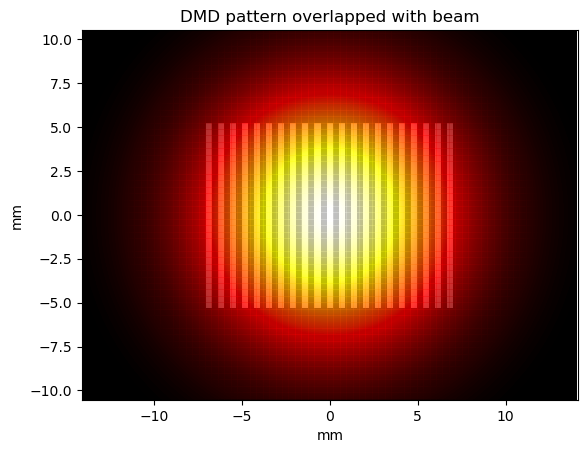

In [35]:
plt.pcolormesh(xx_input.value, yy_input.value, np.abs(DMD_pattern)**2, cmap='Greys_r', shading = 'auto')
plt.pcolormesh(xx_input.value, yy_input.value, np.abs(beam)**2, shading = 'auto', alpha = 0.06, cmap = 'hot')
plt.xlabel('mm')
plt.ylabel('mm')
plt.axis("equal")
plt.title('DMD pattern overlapped with beam')

### Cylindrical lens is horizontal

Text(0.5, 1.0, 'Pattern on 2D waveguide with 1 degree rotational misalignment')

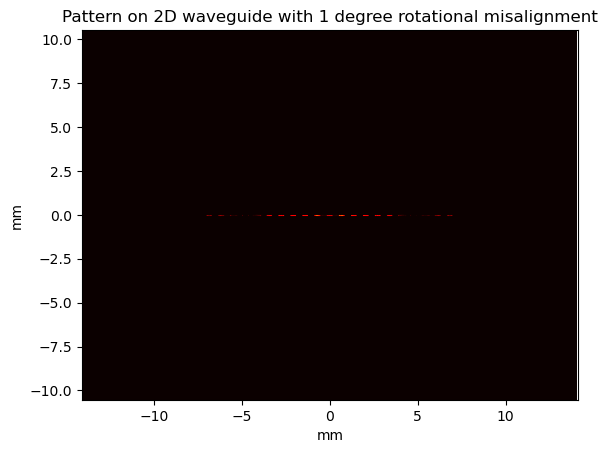

In [36]:
f = 300*u.mm
xx = xx_input
yy = yy_input
cAmps_xy = u.Quantity(DMD_pattern * beam)
rotation_misalignment_1 = 0.0

xx, yy, cAmps_xy = diff2.free_space_propagation(xx, yy, cAmps_xy, d = f, k = k)
xx, yy, cAmps_xy = diff2.parabolic_lens(xx, yy, cAmps_xy, f = f, k = k, clear_aperture=25*u.mm)
xx, yy, cAmps_xy = diff2.free_space_propagation(xx, yy, cAmps_xy, d = 2*f, k = k)
xx, yy, cAmps_xy = diff2.cylindrical_lens(xx, yy, cAmps_xy, f = f, k = k, clear_aperture=25*u.mm, angle_deg = 0 + rotation_misalignment_1)
xx, yy, cAmps_xy = diff2.free_space_propagation(xx, yy, cAmps_xy, d = 2*f, k = k)
xx, yy, cAmps_xy = diff2.parabolic_lens(xx, yy, cAmps_xy, f = f, k = k, clear_aperture=25*u.mm)
xx, yy, cAmps_xy = diff2.free_space_propagation(xx, yy, cAmps_xy, d = f, k = k)

plt.pcolormesh(xx_input.value, yy_input.value, np.abs(cAmps_xy)**2, shading = 'auto', cmap = 'hot')
plt.xlabel('mm')
plt.ylabel('mm')
plt.axis("equal")
plt.title('Pattern on 2D waveguide with 1 degree rotational misalignment')

### Cylindrical lens is vertical

Text(0.5, 1.0, 'Pattern on 2D waveguide with 1 degree rotational misalignment')

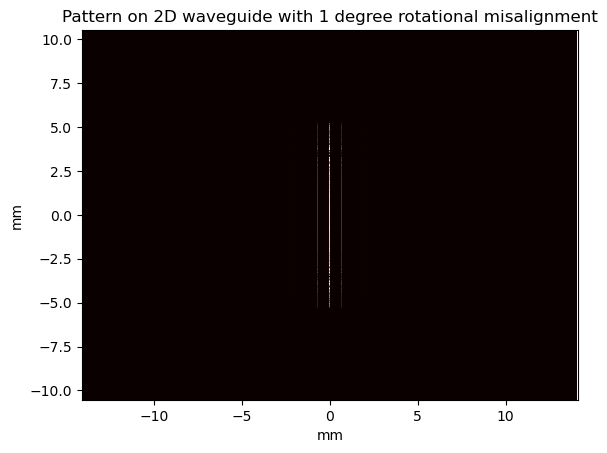

In [37]:
f = 300*u.mm
xx = xx_input
yy = yy_input
cAmps_xy = u.Quantity(DMD_pattern * beam)
rotation_misalignment_1 = 0.0

xx, yy, cAmps_xy = diff2.free_space_propagation(xx, yy, cAmps_xy, d = f, k = k)
xx, yy, cAmps_xy = diff2.parabolic_lens(xx, yy, cAmps_xy, f = f, k = k, clear_aperture=25*u.mm)
xx, yy, cAmps_xy = diff2.free_space_propagation(xx, yy, cAmps_xy, d = 2*f, k = k)
xx, yy, cAmps_xy = diff2.cylindrical_lens(xx, yy, cAmps_xy, f = f, k = k, clear_aperture=25*u.mm, angle_deg = 90 + rotation_misalignment_1)
xx, yy, cAmps_xy = diff2.free_space_propagation(xx, yy, cAmps_xy, d = 2*f, k = k)
xx, yy, cAmps_xy = diff2.parabolic_lens(xx, yy, cAmps_xy, f = f, k = k, clear_aperture=25*u.mm)
xx, yy, cAmps_xy = diff2.free_space_propagation(xx, yy, cAmps_xy, d = f, k = k)

plt.pcolormesh(xx_input.value, yy_input.value, np.abs(cAmps_xy)**2, shading = 'auto', cmap = 'hot')
plt.xlabel('mm')
plt.ylabel('mm')
plt.axis("equal")
plt.title('Pattern on 2D waveguide with 1 degree rotational misalignment')